# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import time 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Cities Data Output File (CSV)
output_data_file = "/Users/ashleypatricia/Documents/GitHub/python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [12]:
api_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

query_url = f"{api_url}units={units}&appid={weather_api_key}"
#print(query_url)

# Create empty list 
final_data = []
pro_records = 1
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for index, city in enumerate(cities): 
    # Creating sets of 50 
    if index >= 50 and index % 50 == 0:
        sets += 1
        pro_records = 1
        time.sleep(10)

    # Create url for each city
    city_url = query_url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {pro_records} of Set {sets} | {city}")
    pro_records += 1

    try: 
        response = requests.get(city_url).json()    
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        windspeed = response["wind"]["speed"]
        country = response["sys"]["country"]
        pull_date = response["dt"]
        final_data.append({"City": city, 
            "Lat": lat, 
            "Lng": lng, 
            "Max Temp": max_temp, 
            "Humidity": humidity, 
            "Cloudiness": cloudiness, 
            "Wind Speed": windspeed, 
            "Country": country, 
            "Date": pull_date})

    except (KeyError, IndexError):
        print("City *not* found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
    

et 4 | san carlos
Processing Record 30 of Set 4 | clyde river
Processing Record 31 of Set 4 | airai
Processing Record 32 of Set 4 | kidal
Processing Record 33 of Set 4 | ilulissat
Processing Record 34 of Set 4 | mar del plata
Processing Record 35 of Set 4 | lewiston
Processing Record 36 of Set 4 | vylgort
City *not* found. Skipping...
Processing Record 37 of Set 4 | barrow
Processing Record 38 of Set 4 | balasheyka
Processing Record 39 of Set 4 | kiruna
Processing Record 40 of Set 4 | sechura
Processing Record 41 of Set 4 | san cristobal
Processing Record 42 of Set 4 | laminusa
Processing Record 43 of Set 4 | kharitonovo
Processing Record 44 of Set 4 | akyab
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | sobolevo
Processing Record 47 of Set 4 | surgut
Processing Record 48 of Set 4 | bulgan
Processing Record 49 of Set 4 | gold coast
Processing Record 50 of Set 4 | abu kamal
Processing Record 1 of Set 5 | norman wells
Processing Record 2 of Set 5 | batalha
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# See new dataframe
city_df = pd.DataFrame(final_data)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,80.98,75,50,19.71,PF,1619067382
1,bredasdorp,-34.5322,20.0403,62.60,94,100,11.50,ZA,1619067382
2,ayan,56.4500,138.1667,30.34,90,83,11.14,RU,1619067383
3,saint-philippe,-21.3585,55.7679,80.60,74,0,9.22,RE,1619066791
4,seoul,37.5683,126.9778,80.60,24,0,9.22,KR,1619066506


In [14]:
# Export to csv
city_df.to_csv("/Users/ashleypatricia/Documents/GitHub/python-api-challenge/WeatherPy/city data.csv", index = False)

In [15]:
# Display the dataframe
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,19.793835,20.781441,60.200456,66.671930,54.877193,8.648947,1.619068e+09
std,33.954038,89.676167,20.279777,23.442247,37.630555,5.906417,2.168562e+02
min,-54.800000,-179.166700,8.740000,8.000000,0.000000,0.160000,1.619067e+09
25%,-8.524800,-59.411075,42.805000,53.000000,19.250000,4.470000,1.619067e+09
50%,24.305700,25.808300,63.965000,71.500000,66.500000,7.505000,1.619068e+09
75%,48.885400,97.556525,77.650000,85.000000,90.000000,11.500000,1.619068e+09
max,78.218600,179.316700,100.000000,100.000000,100.000000,36.530000,1.619068e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
#  Get the indices of cities that have humidity over 100%.
high_hum = city_df[city_df["Humidity"] > 100]
# Confirm that none of the cities have a humidity above 100%
high_hum

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

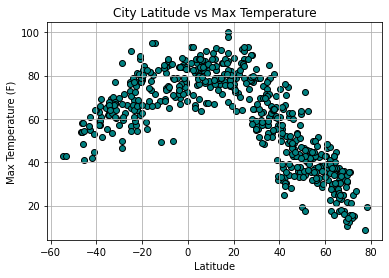

In [23]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Humidity Plot

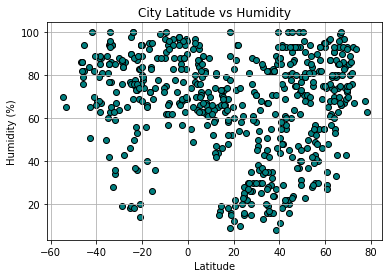

In [24]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Cloudiness Plot

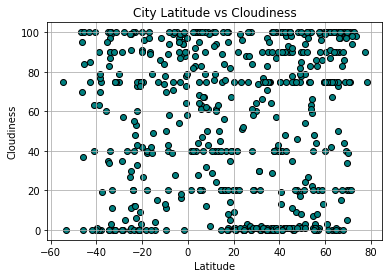

In [25]:
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Latitude vs. Wind Speed Plot

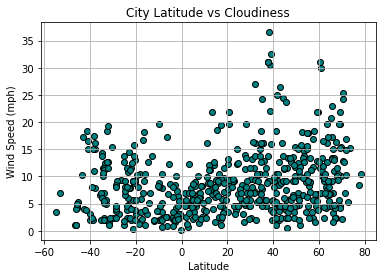

In [26]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", facecolors="teal", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Cloudiness")
plt.grid(True)
#plt.savefig("plot1.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
'''
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show

'''

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show

'''

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show

'''

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show

'''

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

'''

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

'''

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show

'''

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
'''
x_values = 
y_values = 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show

'''